
--- Sales Summary Table ---
    product  total_qty  revenue
0  Keyboard         35   2625.0
1    Laptop          8   9600.0
2   Monitor         10   3000.0
3     Mouse         45   1125.0
---------------------------


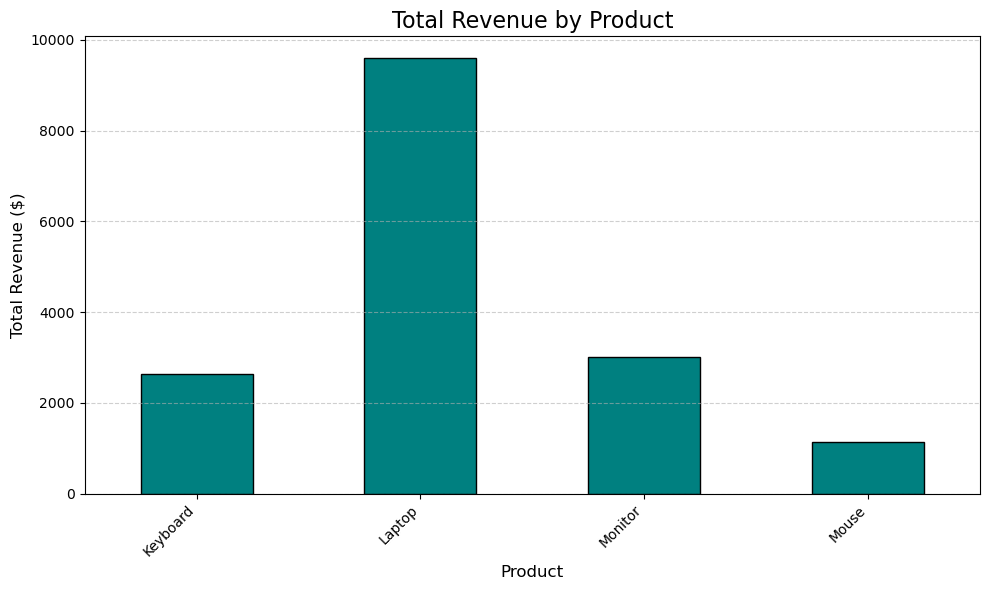

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_NAME = "sales_data.db"
TABLE_NAME = "sales"

def setup_database():
    conn = None
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()
        cursor.execute(f"DROP TABLE IF EXISTS {TABLE_NAME}")
        
        create_table_sql = f"""
        CREATE TABLE {TABLE_NAME} (
            sale_id INTEGER PRIMARY KEY,
            product TEXT NOT NULL,
            quantity INTEGER NOT NULL,
            price REAL NOT NULL
        );
        """
        cursor.execute(create_table_sql)
        
        sample_data = [
            ('Laptop', 5, 1200.00),
            ('Keyboard', 20, 75.00),
            ('Laptop', 3, 1200.00),
            ('Mouse', 35, 25.00),
            ('Keyboard', 15, 75.00),
            ('Monitor', 10, 300.00),
            ('Mouse', 10, 25.00)
        ]
        
        insert_sql = f"INSERT INTO {TABLE_NAME} (product, quantity, price) VALUES (?, ?, ?)"
        cursor.executemany(insert_sql, sample_data)
        conn.commit()
        return True
    except sqlite3.Error as e:
        print(f"Database setup failed: {e}")
        return False
    finally:
        if conn:
            conn.close()

def analyze_sales():
    conn = None
    try:
        conn = sqlite3.connect(DB_NAME)

        query = f"""
        SELECT 
            product, 
            SUM(quantity) AS total_qty, 
            SUM(quantity * price) AS revenue 
        FROM {TABLE_NAME} 
        GROUP BY product;
        """

        df = pd.read_sql_query(query, conn)
        
        # Display output using print 
        print("\n--- Sales Summary Table ---")
        print(df)
        print("---------------------------")
        
        # Display output using basic matplotlib bar chart 
        if df.empty:
            return
            
        plt.figure(figsize=(10, 6))
        
        df.plot(
            kind='bar', 
            x='product', 
            y='revenue', 
            legend=False, 
            ax=plt.gca(), 
            color='teal', 
            edgecolor='black'
        )
        
        plt.title('Total Revenue by Product', fontsize=16)
        plt.xlabel('Product', fontsize=12)
        plt.ylabel('Total Revenue ($)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        
        plt.show()
        
    except sqlite3.Error as e:
        print(f"Database analysis failed: {e}")
    except pd.io.sql.DatabaseError as e:
        print(f"SQL query error: {e}")
    finally:
        if conn:
            conn.close()

if __name__ == "__main__":
    if setup_database():
        analyze_sales()